In [1]:
import pandas as pd
import json
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start': '1',
      'limit': '10',
      'convert': 'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7d4ce2fb-4c7a-4cd0-80d0-350cca3bede3',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        response.raise_for_status()
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects, requests.exceptions.HTTPError) as e:
        print(f"Error occurred: {e}")
        return
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

df = pd.DataFrame()
for i in range(3):
    api_runner()
    print('API Runner completed')
    sleep(60)  # Aumentar el tiempo de espera si es necesario

# Aquí puedes seguir trabajando con el DataFrame `df`


API Runner completed
API Runner completed
API Runner completed


In [2]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974587e+07,1.974587e+07,...,56.4143,1.303289e+12,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
1,1027,Ethereum,ETH,ethereum,9248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202989e+08,1.202989e+08,...,14.3291,3.112897e+11,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
2,825,Tether USDt,USDT,tether,95660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,...,5.4324,1.202555e+11,None,2024-08-27T19:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 15:47:42.931963
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,...,3.6938,8.025064e+10,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661565e+08,5.831988e+08,...,3.3188,9.021751e+10,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
5,3408,USDC,USDC,usd-coin,21695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.430250e+10,3.430250e+10,...,1.5791,3.430134e+10,None,2024-08-27T19:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 15:47:42.931963
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,...,1.5345,5.934765e+10,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457111e+11,1.457111e+11,...,0.6998,1.520600e+10,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
8,11419,Toncoin,TON,toncoin,535,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.534735e+09,5.111066e+09,...,0.6491,2.843580e+10,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
9,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.681806e+10,8.681815e+10,...,0.6472,1.406285e+10,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963


In [10]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974554e+07,1.974554e+07,False,NaN,1,NaN,NaN,None,2024-08-27T00:45:00.000Z,63044.985141,2.762395e+10,49.1216,0.090588,-1.692975,4.591744,-7.257679,2.533038,-7.918360,1.244857e+12,56.3512,1.323945e+12,None,2024-08-27T00:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
1,1027,Ethereum,ETH,ethereum,9246,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202991e+08,1.202991e+08,True,NaN,2,NaN,NaN,None,2024-08-27T00:44:00.000Z,2692.086765,1.224637e+10,31.6267,0.195581,-2.225485,1.305830,-17.144739,-21.709490,-29.957163,3.238557e+11,14.6698,3.238557e+11,None,2024-08-27T00:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
2,825,Tether USDt,USDT,tether,95549,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.178621e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-27T00:44:00.000Z,1.000178,5.100637e+10,27.6215,-0.008146,-0.026421,-0.037090,0.017186,0.127088,0.134834,1.178830e+11,5.3361,1.202777e+11,None,2024-08-27T00:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-26 20:47:23.713845
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459353e+08,1.459353e+08,False,NaN,4,NaN,NaN,None,2024-08-27T00:44:00.000Z,552.384776,1.829550e+09,9.0355,0.524407,-3.628652,-2.562377,-5.137587,-4.587587,-8.211489,8.061243e+10,3.6489,8.061243e+10,None,2024-08-27T00:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661609e+08,5.832006e+08,True,NaN,5,NaN,NaN,None,2024-08-27T00:44:00.000Z,158.186986,2.572464e+09,24.6394,0.488347,-0.512540,8.015835,-14.482433,6.990985,-6.301796,7.374059e+10,3.3379,9.225475e+10,None,2024-08-27T00:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
5,3408,USDC,USDC,usd-coin,21680,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.457093e+10,3.457093e+10,False,NaN,6,NaN,NaN,None,2024-08-27T00:44:00.000Z,0.999985,5.377298e+09,44.2281,0.005279,-0.003899,-0.017831,-0.000812,0.011001,-0.006691,3.457042e+10,1.5649,3.457042e+10,None,2024-08-27T00:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-26 20:47:23.713845
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-27T00:45:00.000Z,0.589555,1.112291e+09,27.4948,0.195574,-1.851092,-2.171889,-1.003342,24.200471,11.784189,3.312128e+10,1.4993,5.895555e+10,None,2024-08-27T00:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457004e+11,1.457004e+11,True,NaN,8,NaN,NaN,None,2024-08-27T00:45:00.000Z,0.106024,5.566601e+08,-3.8873,0.586729,-3.385113,3.006404,-19.484380,-15.835497,-35.926953,1.544777e+10,0.6993,1.544777e+10,None,2024-08-27T00:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-26 20:47:23.713845
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.683068e+10,8.

In [3]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19745868.00000,19745868.00000,...,56.41430,1303288891579.32007,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
1,1027,Ethereum,ETH,ethereum,9248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298912.44583,120298912.44583,...,14.32910,311289723539.53998,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
2,825,Tether USDt,USDT,tether,95660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118039332678.20683,120256329980.56221,...,5.43240,120255548909.87000,None,2024-08-27T19:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 15:47:42.931963
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935231.69625,145935231.69625,...,3.69380,80250641550.09000,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466156467.87874,583198807.74795,...,3.31880,90217508785.55000,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
5,3408,USDC,USDC,usd-coin,21695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34302502680.75170,34302502680.75170,...,1.57910,34301335283.09000,None,2024-08-27T19:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 15:47:42.931963
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,...,1.53450,59347653262.98000,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145711136383.70520,145711136383.70520,...,0.69980,15205999089.04000,None,2024-08-27T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
8,11419,Toncoin,TON,toncoin,535,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2534734933.81415,5111065572.81521,...,0.64910,28435800045.81000,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963
9,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86818056590.43202,86818149986.89905,...,0.64720,14062852739.70000,None,2024-08-27T19:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 15:47:42.931963


In [8]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07406,-2.09621,4.27604,-8.88909,2.92081,-7.83224
Ethereum,0.04067,-3.63141,-0.61851,-20.89249,-23.36231,-31.01955
Tether USDt,-0.00008,-0.03950,-0.01006,0.00309,0.18479,0.08106
BNB,-0.10023,-0.68855,-4.12623,-5.82578,-3.63662,-7.43519
Solana,-0.41999,-2.19696,7.41547,-16.14550,9.63336,-9.03261
USDC,-0.00437,-0.01283,-0.00145,-0.00311,0.01485,-0.02549
XRP,-0.65699,1.91319,-1.54119,-1.57467,25.19142,13.21977
Dogecoin,-0.10448,-1.05716,0.18813,-19.73630,-15.53788,-36.94060
Toncoin,1.33541,3.79674,-16.55448,-15.69381,-25.47329,-14.15638


In [ ]:
#Utilizando Stack, vamos a convertir la primera fila en una columna 

In [9]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.07406
             quote.USD.percent_change_24h    -2.09621
             quote.USD.percent_change_7d      4.27604
             quote.USD.percent_change_30d    -8.88909
             quote.USD.percent_change_60d     2.92081
             quote.USD.percent_change_90d    -7.83224
Ethereum     quote.USD.percent_change_1h      0.04067
             quote.USD.percent_change_24h    -3.63141
             quote.USD.percent_change_7d     -0.61851
             quote.USD.percent_change_30d   -20.89249
             quote.USD.percent_change_60d   -23.36231
             quote.USD.percent_change_90d   -31.01955
Tether USDt  quote.USD.percent_change_1h     -0.00008
             quote.USD.percent_change_24h    -0.03950
             quote.USD.percent_change_7d     -0.01006
             quote.USD.percent_change_30d     0.00309
             quote.USD.percent_change_60d     0.18479
             quote.USD.percent_change_90

In [10]:
#Debido a que 'stack' cambia el tipo de elemento, tenemos que volver a convertir todo en un dataframe

In [11]:
type(df4)

pandas.core.series.Series

In [12]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.07406
            quote.USD.percent_change_24h  -2.09621
            quote.USD.percent_change_7d    4.27604
            quote.USD.percent_change_30d  -8.88909
            quote.USD.percent_change_60d   2.92081
            quote.USD.percent_change_90d  -7.83224
Ethereum    quote.USD.percent_change_1h    0.04067
            quote.USD.percent_change_24h  -3.63141
            quote.USD.percent_change_7d   -0.61851
            quote.USD.percent_change_30d -20.89249
            quote.USD.percent_change_60d -23.36231
            quote.USD.percent_change_90d -31.01955
Tether USDt quote.USD.percent_change_1h   -0.00008
            quote.USD.percent_change_24h  -0.03950
            quote.USD.percent_change_7d   -0.01006
            quote.USD.percent_change_30d   0.00309
            quote.USD.percent_change_60d   0.18479
            quote.USD.percent_change_90d   0.08106
BNB         quote.USD.percent_change_1h   -0.10023
            quote.USD.percent_change_24h  -0.68855
            quote.USD.percent_change_7d   -4.12623
            quote.USD.percent_change_30d  -5.82578
            quote.USD.percent_change_60d  -3.63662
            quote.USD.percent_change_90d  -7.43519
Solana      quote.USD.percent_change_1h   -0.41999
            quote.USD.percent_change_24h  -2.19696
            quote.USD.percent_change_7d    7.41547
            quote.USD.percent_change_30d -16.14550
            quote.USD.percent_change_60d   9.63336
            quote.USD.percent_change_90d  -9.03261
USDC        quote.USD.percent_change_1h   -0.00437
            quote.USD.percent_change_24h  -0.01283
            quote.USD.percent_change_7d   -0.00145
            quote.USD.percent_change_30d  -0.00311
            quote.USD.percent_change_60d   0.01485
            quote.USD.percent_change_90d  -0.02549
XRP         quote.USD.percent_change_1h   -0.65699
            quote.USD.percent_change_24h   1.91319
            quote.USD.percent_change_7d   -1.54119
            quote.USD.percent_change_30d  -1.57467
            quote.USD.percent_change_60d  25.19142
            quote.USD.percent_change_90d  13.21977
Dogecoin    quote.USD.percent_change_1h   -0.10448
            quote.USD.percent_change_24h  -1.05716
            quote.USD.percent_change_7d    0.18813
            quote.USD.percent_change_30d -19.73630
            quote.USD.percent_change_60d -15.53788
            quote.USD.percent_change_90d -36.94060
Toncoin     quote.USD.percent_change_1h    1.33541
            quote.USD.percent_change_24h   3.79674
            quote.USD.percent_change_7d  -16.55448
            quote.USD.percent_change_30d -15.69381
            quote.USD.percent_change_60d -25.47329
            quote.USD.percent_change_90d -14.15638
TRON        quote.USD.percent_change_1h   -0.27407
            quote.USD.percent_change_24h  -1.45465
            quote.USD.percent_change_7d    2.27251
            quote.USD.percent_change_30d  16.71513
            quote.USD.percent_change_60d  31.34275
            quote.USD.percent_change_90d  44.29550

In [13]:
type(df5)

pandas.core.frame.DataFrame

In [15]:
#Vamos a agregar un indice a los datos, para ello, vamos a analizar primeramente cuantos valores disponemos
df5.count()

values    60
dtype: int64

In [26]:
#Vamos a crear un indice para el data frame

index = pd.Index(range(60))

# Vamos a establecer la serie anterior como indice
# usando set_index() function
df6 = df5.set_index(index)
df6

# Si solo tiene el índice y los valores, intente hacer reset_index "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07039
1,Bitcoin,quote.USD.percent_change_24h,-1.72718
2,Bitcoin,quote.USD.percent_change_7d,4.55117
3,Bitcoin,quote.USD.percent_change_30d,-7.26054
4,Bitcoin,quote.USD.percent_change_60d,2.49304
5,Bitcoin,quote.USD.percent_change_90d,-7.94451
6,Ethereum,quote.USD.percent_change_1h,0.17353
7,Ethereum,quote.USD.percent_change_24h,-2.19708
8,Ethereum,quote.USD.percent_change_7d,1.42478
9,Ethereum,quote.USD.percent_change_30d,-17.07117


In [28]:
# Cambiando el nombre de la columna

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07039
1,Bitcoin,quote.USD.percent_change_24h,-1.72718
2,Bitcoin,quote.USD.percent_change_7d,4.55117
3,Bitcoin,quote.USD.percent_change_30d,-7.26054
4,Bitcoin,quote.USD.percent_change_60d,2.49304
5,Bitcoin,quote.USD.percent_change_90d,-7.94451
6,Ethereum,quote.USD.percent_change_1h,0.17353
7,Ethereum,quote.USD.percent_change_24h,-2.19708
8,Ethereum,quote.USD.percent_change_7d,1.42478
9,Ethereum,quote.USD.percent_change_30d,-17.07117


In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.07039
1,Bitcoin,24h,-1.72718
2,Bitcoin,7d,4.55117
3,Bitcoin,30d,-7.26054
4,Bitcoin,60d,2.49304
5,Bitcoin,90d,-7.94451
6,Ethereum,1h,0.17353
7,Ethereum,24h,-2.19708
8,Ethereum,7d,1.42478
9,Ethereum,30d,-17.07117


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

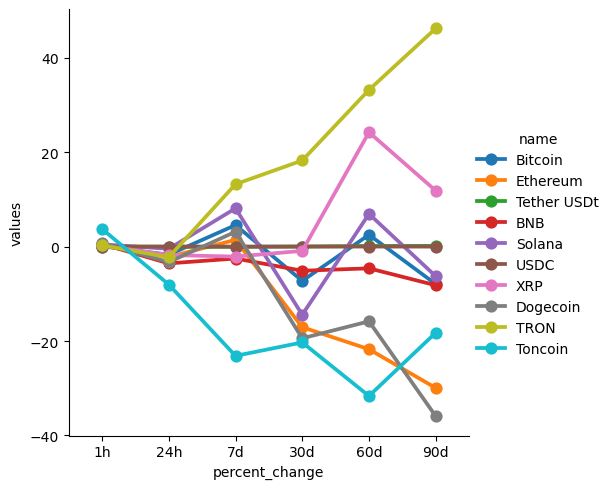

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [4]:

# Tambien podemos consultar solamente la columna que nos interese

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62061.37579,2024-08-27 15:47:42.931963
10,Bitcoin,62061.37579,2024-08-27 15:48:43.203082
20,Bitcoin,62061.37579,2024-08-27 15:49:43.507962


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

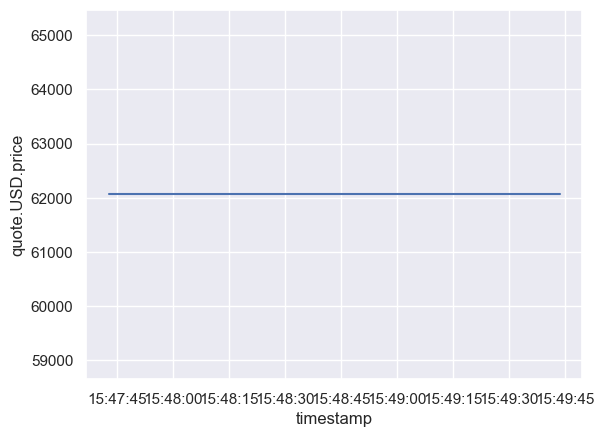

In [7]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)